# Notebook for generating plots of trained agents

This code will load the results for the specified experiments, generate plots, and save them in the `experiments_dir` directory

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

In [17]:
plt.rc("font", family="serif")
plt.rc("xtick", labelsize="small")
plt.rc("ytick", labelsize="small")
plt.rc("legend", fontsize="small")
plt.rc("axes", labelsize="small")

* Set the directory in which all the experiments to be plotted together are stored.
* Set the list of subdirs (experiments) you want to include in the plots

In [18]:
experiments_dir = "/home/elias/september/3_landmarks/classic_reward/2"
list_of_experiments = ["centralized", "independent"]

In [19]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    individual_reward = pd.DataFrame()
    cooperative_reward = pd.DataFrame()

    for j, experiment_name in enumerate(os.listdir(subdir)):
        r = []
        r_t = []
        l = []
        x_ = []
        a = []
        y_ = []
        col = []
        ind = []
        result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")
        for result in result_raw:
            dump = json.loads(result)
            a.append(dump["custom_metrics"].get("goal_alignment_mean"))
            y_.append(dump["timesteps_total"])
            r_t.append(dump["episode_reward_mean"])

            metrics = dump.get("evaluation")
            if metrics is not None:
                custom = metrics.get("custom_metrics")
                col.append(custom["reward for collective goal_mean"])
                ind.append(custom["reward for individual goal_mean"])
                x_.append(dump["timesteps_total"])
                r.append(metrics["episode_reward_mean"])
                l.append(metrics["episode_len_mean"])

        eval_reward = pd.concat(
            [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
        )
        episode_len = pd.concat(
            [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
        )
        alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
        train_reward = pd.concat(
            [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
        )
        individual_reward = pd.concat([individual_reward, pd.DataFrame(ind)], ignore_index=True, axis=1)
        cooperative_reward = pd.concat([cooperative_reward, pd.DataFrame(col)], ignore_index=True, axis=1)


        if len(x_) > len(eval_x):
            eval_x = x_
        if len(y_) > len(train_x):
            train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
        "individual_reward": individual_reward,
        "cooperative_reward": cooperative_reward,
    }

Training plots

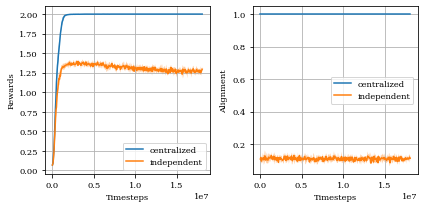

In [20]:
plt.figure(figsize=(6, 3))
plt.ylabel("Reward")

i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["train_x"], result["train_reward"].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"],
        result["train_reward"].mean(axis=1) - result["train_reward"].std(axis=1),
        result["train_reward"].mean(axis=1) + result["train_reward"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["train_x"], result["alignment"].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"],
        result["alignment"].mean(axis=1) - result["alignment"].std(axis=1),
        result["alignment"].mean(axis=1) + result["alignment"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

Eval plots

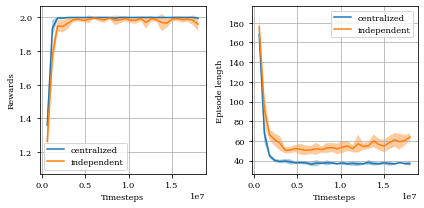

In [21]:
plt.figure(figsize=(6, 3))

i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"], result["eval_reward"].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"],
        result["eval_reward"].mean(axis=1) - result["eval_reward"].std(axis=1),
        result["eval_reward"].mean(axis=1) + result["eval_reward"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"], result["episode_len"].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"],
        result["episode_len"].mean(axis=1) - result["episode_len"].std(axis=1),
        result["episode_len"].mean(axis=1) + result["episode_len"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

Individual and cooperative (zero-shot) results

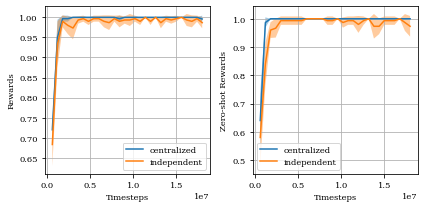

In [22]:
plt.figure(figsize=(6, 3))

i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"], result["individual_reward"].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"],
        result["individual_reward"].mean(axis=1) - result["individual_reward"].std(axis=1),
        result["individual_reward"].mean(axis=1) + result["individual_reward"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"], result["cooperative_reward"].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"],
        result["cooperative_reward"].mean(axis=1) - result["cooperative_reward"].std(axis=1),
        result["cooperative_reward"].mean(axis=1) + result["cooperative_reward"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Zero-shot Rewards")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "individual_vs_cooperative.png"), dpi=300, bbox_inches='tight', transparent=True)